Graph saved as 'memory_vs_reliability_by_language.png'


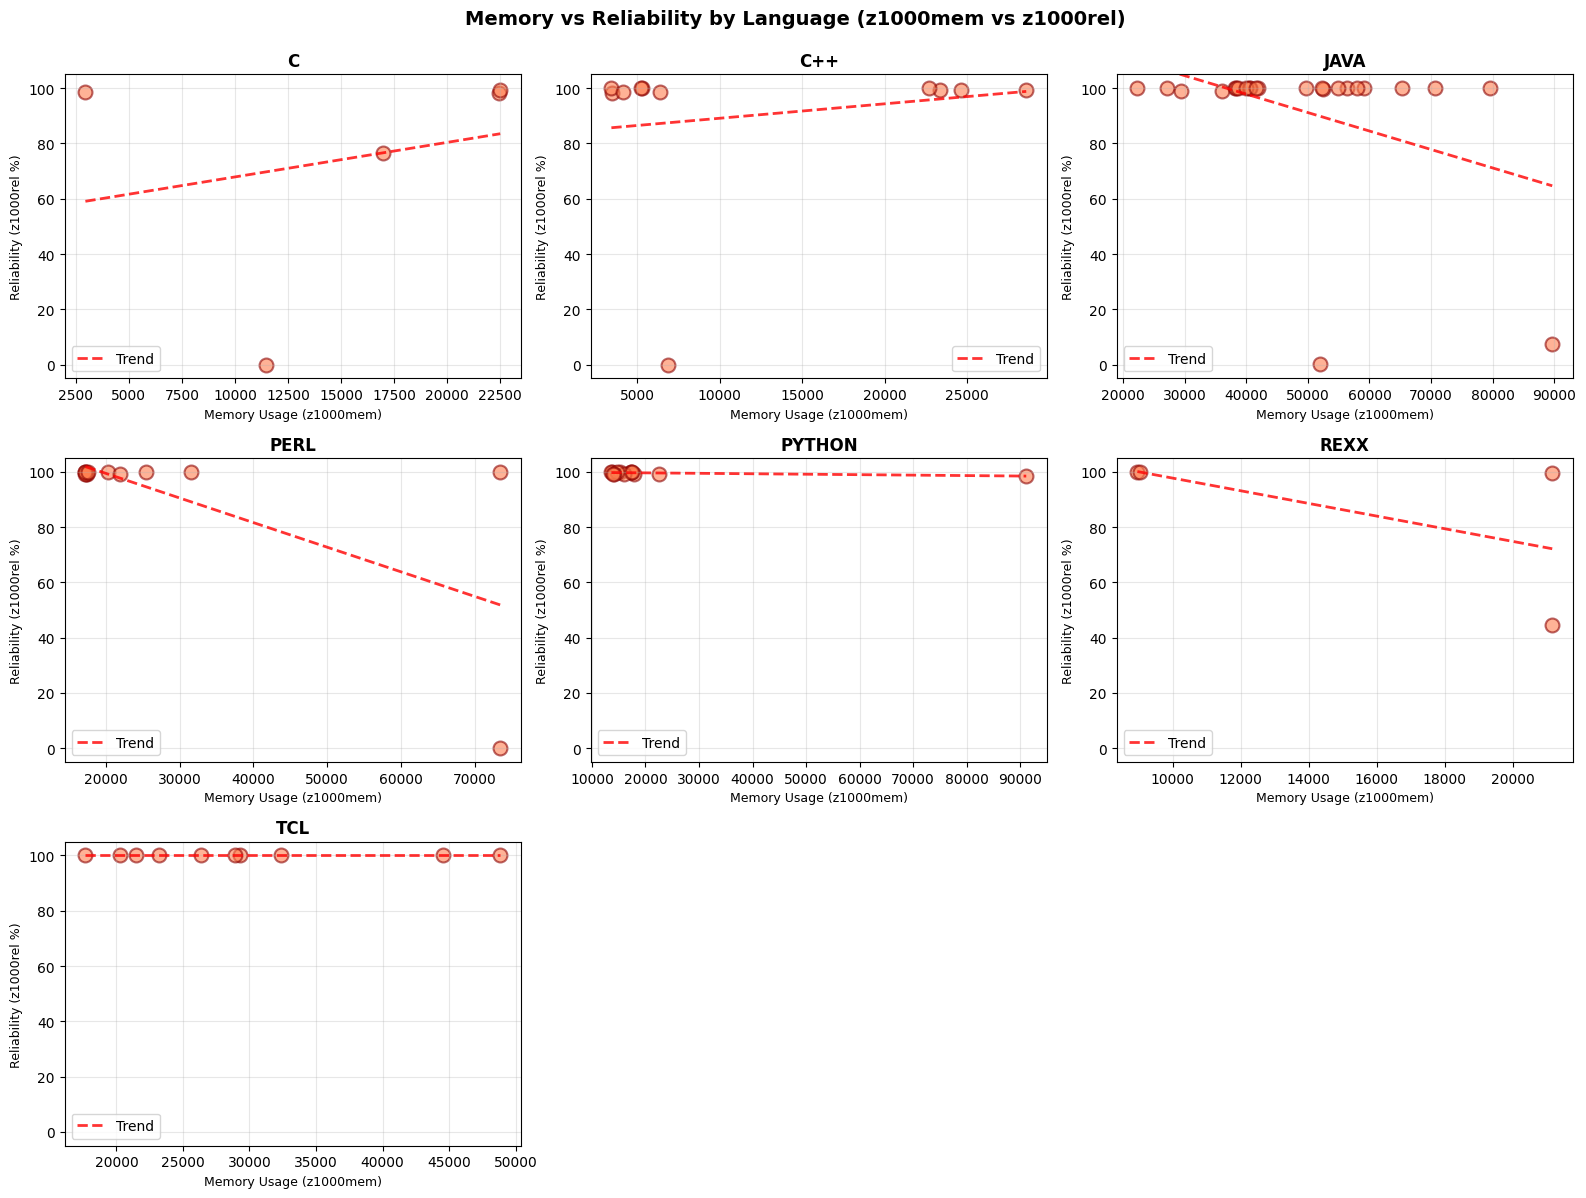


=== Summary Statistics by Language ===


C:
  Count: 5
  Memory (z1000mem) - Mean: 15257.60, Median: 16968.00
  Reliability (z1000rel) - Mean: 74.46, Median: 98.10

C++:
  Count: 11
  Memory (z1000mem) - Mean: 12188.36, Median: 6384.00
  Reliability (z1000rel) - Mean: 90.25, Median: 99.24

JAVA:
  Count: 24
  Memory (z1000mem) - Mean: 48933.33, Median: 45828.00
  Reliability (z1000rel) - Mean: 91.88, Median: 100.00

PERL:
  Count: 13
  Memory (z1000mem) - Mean: 28265.23, Median: 17576.00
  Reliability (z1000rel) - Mean: 92.07, Median: 100.00

PYTHON:
  Count: 13
  Memory (z1000mem) - Mean: 21920.00, Median: 16024.00
  Reliability (z1000rel) - Mean: 99.59, Median: 100.00

REXX:
  Count: 4
  Memory (z1000mem) - Mean: 15078.00, Median: 15096.00
  Reliability (z1000rel) - Mean: 86.09, Median: 99.81

TCL:
  Count: 10
  Memory (z1000mem) - Mean: 29288.80, Median: 27616.00
  Reliability (z1000rel) - Mean: 100.00, Median: 100.00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('assignment_3_dataset.csv', index_col=0)

# Normalize language names to lowercase
df['lang'] = df['lang'].str.lower()

# Remove rows with missing z1000mem or z1000rel values
df_clean = df.dropna(subset=['z1000mem', 'z1000rel'])

# Get unique languages
languages = sorted(df_clean['lang'].unique())

# Calculate grid dimensions (3 columns for layout)
n_langs = len(languages)
n_cols = 3
n_rows = (n_langs + n_cols - 1) // n_cols

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Generate a plot for each language
for idx, lang in enumerate(languages):
    ax = axes[idx]

    # Filter data for this language
    lang_data = df_clean[df_clean['lang'] == lang]

    # Create scatter plot
    ax.scatter(lang_data['z1000mem'], lang_data['z1000rel'],
               s=100, alpha=0.6, color='coral', edgecolors='darkred', linewidth=1.5)

    # Add trend line if there are at least 2 points
    if len(lang_data) >= 2:
        z = np.polyfit(lang_data['z1000mem'], lang_data['z1000rel'], 1)
        p = np.poly1d(z)
        x_trend = np.linspace(lang_data['z1000mem'].min(), lang_data['z1000mem'].max(), 100)
        ax.plot(x_trend, p(x_trend), "r--", linewidth=2, alpha=0.8, label='Trend')
        ax.legend(loc='best')

    # Set labels and title
    ax.set_xlabel('Memory Usage (z1000mem)', fontsize=9)
    ax.set_ylabel('Reliability (z1000rel %)', fontsize=9)
    ax.set_title(f'{lang.upper()}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([-5, 105])

# Hide extra subplots
for idx in range(len(languages), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Memory vs Reliability by Language (z1000mem vs z1000rel)',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('memory_vs_reliability_by_language.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'memory_vs_reliability_by_language.png'")
plt.show()

# Print summary statistics for each language
print("\n=== Summary Statistics by Language ===\n")
for lang in languages:
    lang_data = df_clean[df_clean['lang'] == lang]
    print(f"\n{lang.upper()}:")
    print(f"  Count: {len(lang_data)}")
    print(f"  Memory (z1000mem) - Mean: {lang_data['z1000mem'].mean():.2f}, Median: {lang_data['z1000mem'].median():.2f}")
    print(f"  Reliability (z1000rel) - Mean: {lang_data['z1000rel'].mean():.2f}, Median: {lang_data['z1000rel'].median():.2f}")